# ASSIGNMENT_1_AAI_520_NLP

**The Social Dilemma Tweets - Text Classification**

# Context

The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social networking, with tech experts sounding the alarm on their own creations as the tech experts sound the alarm on the dangerous human impact of social networking.

Initial release: January 2020
Director: Jeff Orlowski
Producer: Larissa Rhodes
Music director: Mark A. Crawford
Screenplay: Jeff Orlowski, Vickie Curtis, Davis Coombe


The dataset was extracted using TwitterAPI

**Attribute Information:**

user_name: The name of the user, as they’ve defined it.
    
user_location: The user-defined location for this account’s profile.
    
user_description: The user-defined UTF-8 string describing their account.
    
user_created: Time and date, when the account was created.
    
user_followers: The number of followers an account currently has.
    
user_friends: The number of friends an account currently has.
    
user_favourites: The number of favorites an account currently has.
    
user_verified: When true, indicates that the user has a verified account.
    
date: UTC time and date when the Tweet was created.
    
text: The actual UTF-8 text of the Tweet.
    
hashtags: All the other hashtags posted in the tweet along with #TheSocialDilemma.
    
source: Utility used to post the Tweet, Tweets from the Twitter website have a source value - web.
    
is_retweet: Indicates whether this Tweet has been Retweeted by the authenticating user.
    
Sentiment(Target variable): Indicates the sentiment of the tweet, consists of three categories: Positive, neutral, and
negative.


# Import Libraries

In [2]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("TheSocialDilemma.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [4]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
20063,scp.,NaN,"“Through love, all is possible.” - SJM - See m...",2013-02-19 00:55:12,431,193,32958,False,2020-10-09 00:25:53,#TheSocialDilemma yalll.... this shit... we kn...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
20064,Dono6971,United States,"Father, Husband, and a Dude|| Love Notre Dame ...",2010-01-06 04:08:41,172,96,50159,False,2020-10-09 00:24:45,Peeps:\n\nFind 90 minutes this weekend and wat...,NaN,Twitter for iPhone,False,Positive
20065,Remi Shores,NaN,Genderfluid / They/Them/Theirs / Queer Christi...,2012-05-16 23:49:13,387,652,7885,False,2020-10-09 00:11:42,"So you watched #thesocialdilemma, or have been...",['thesocialdilemma'],Twitter Web App,False,Negative
20066,Scott the Great and Terrible,NaN,"I can't recall the taste of food, nor the soun...",2020-03-16 18:20:31,103,84,2976,False,2020-10-09 00:10:16,Good social media advice:\n\nChoose the thing ...,['TheSocialDilemma'],Twitter Web App,False,Positive
20067,Get Outside Media,"Telluride, CO",CREATIVE AGENCY | BRAND + CONTENT + DESIGN + P...,2018-07-14 04:44:23,133,898,1131,False,2020-10-09 00:00:31,Boulder director Jeff Orlowski hopes viewers o...,['TheSocialDilemma'],Hootsuite Inc.,False,Neutral


# Exploratory Data Analysis(EDA)

In [5]:
# print shape of data.
data.shape              

(20068, 14)

In [6]:
#information of all columns in the dataframe
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB


In [7]:
#Basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe()

,user_followers,user_friends,user_favourites
count,2.006800e+04,20068.000000,20068.000000
mean,8.805132e+03,1117.027656,13936.924606
std,1.540008e+05,5169.791715,30437.971876
min,0.000000e+00,0.000000,0.000000
25%,9.700000e+01,186.000000,789.000000
50%,3.660000e+02,441.000000,3866.500000
75%,1.289000e+03,1001.000000,13294.500000
max,1.562443e+07,288625.000000,708749.000000


In [8]:
# Check for NULL values.
data.isnull().sum(axis=0)          

user_name              1
user_location       4208
user_description    1383
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4297
source                 0
is_retweet             0
Sentiment              0
dtype: int64

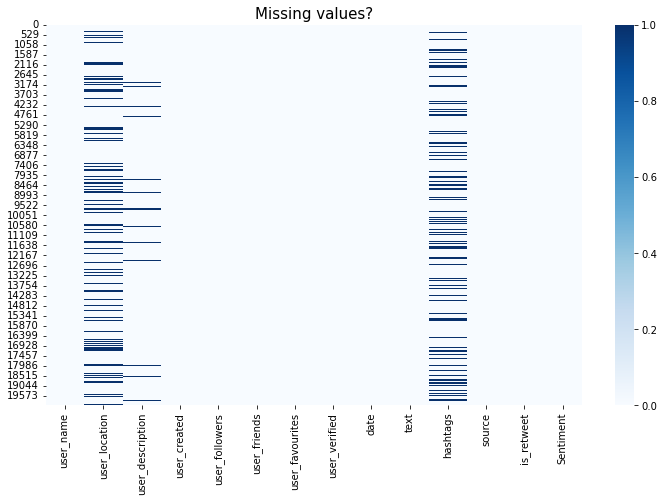

In [9]:
#Visualization of missing value using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       
plt.title("Missing values?", fontsize = 15)
plt.show()

The lines in the above heatmap will visualize the location of missing values (i.e. the missing value indexes in the dataframe).

In [10]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [11]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

user_name              1
user_description    1383
user_location       4208
hashtags            4297
dtype: int64

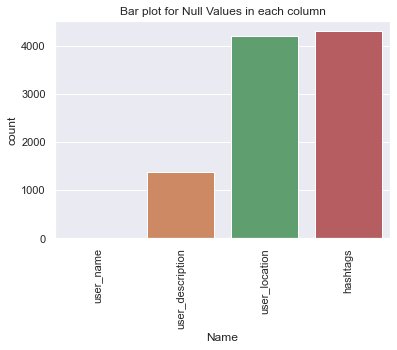

In [12]:
#plotting the count of missing values 
plot_missing_values(data)

We can see that more data is missing from the hashtags and user_location columns

**Unique Values**

In [13]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [14]:
unidf = return_unique_values(data)
print(unidf)

            Features  Uniques
0          user_name    15737
1      user_location     5777
2   user_description    14899
3       user_created    16109
4     user_followers     4141
5       user_friends     3220
6    user_favourites     9945
7      user_verified        2
8               date    19811
9               text    19850
10          hashtags     1753
11            source       82
12        is_retweet        1
13         Sentiment        3


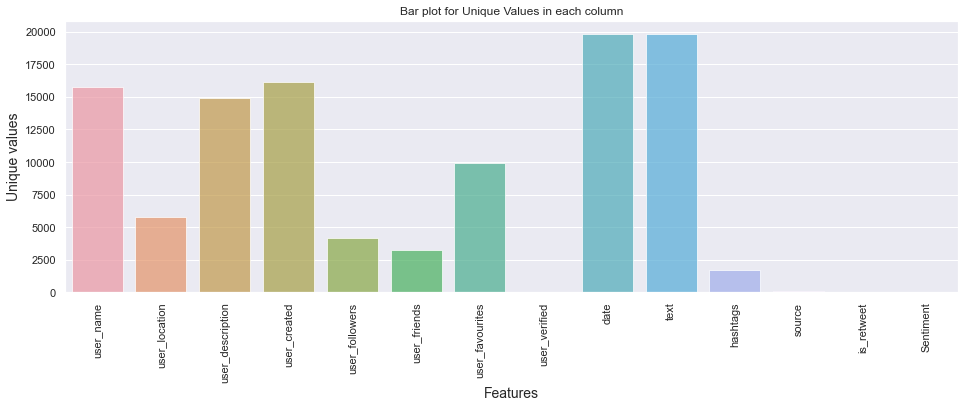

In [15]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Visual analysis of the number of unique values in every column

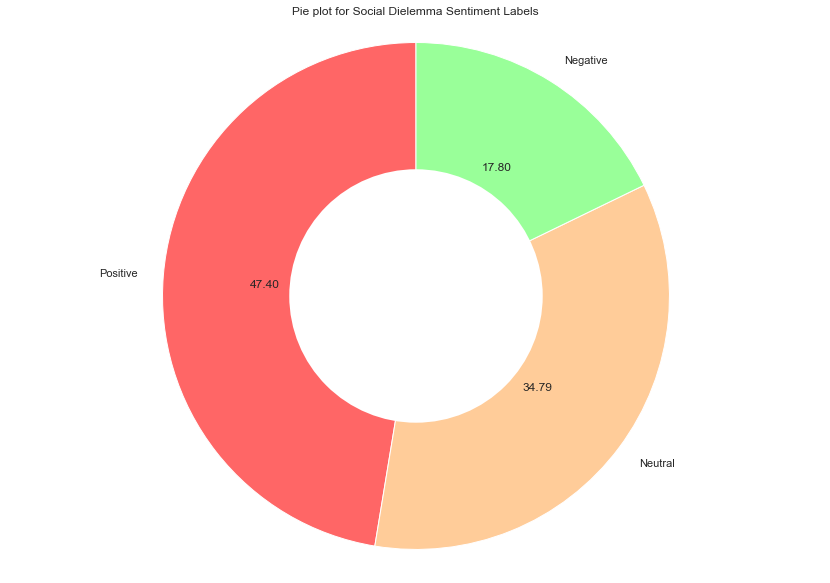

In [16]:
#plot for Social Dilemma Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['Sentiment'].value_counts(), labels=data['Sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Social Dielemma Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

Most of the tweets are positive in nature (47.4%), which indicates a wide appreciation of the documentary among users, followed by 34.79% neutral and 17.8% neutral tweets.

In [17]:
# function to create labeled barplots
def labeled_barplot(data, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data[feature],
        palette=pallet,
        order=data[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} tweeting about Social Dielamma'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Top 20 users by number of tweets

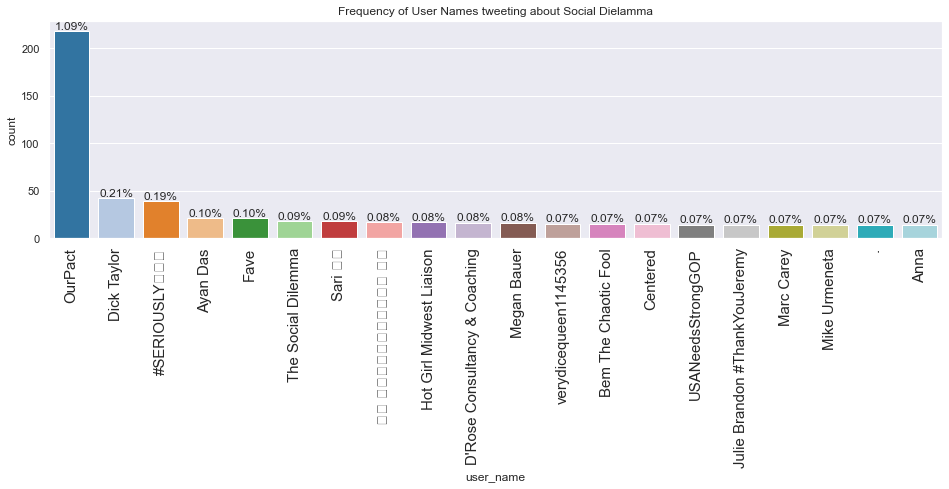

In [18]:
#Visualize the top 20 users by number of tweets
labeled_barplot(data, 'user_name', 'User Names','tab20')

OurPact is the user who created the highest number of tweets in this dataset, followed by Dick Taylor and #SERIOUSLY

# Top 20 user sources by number of tweets

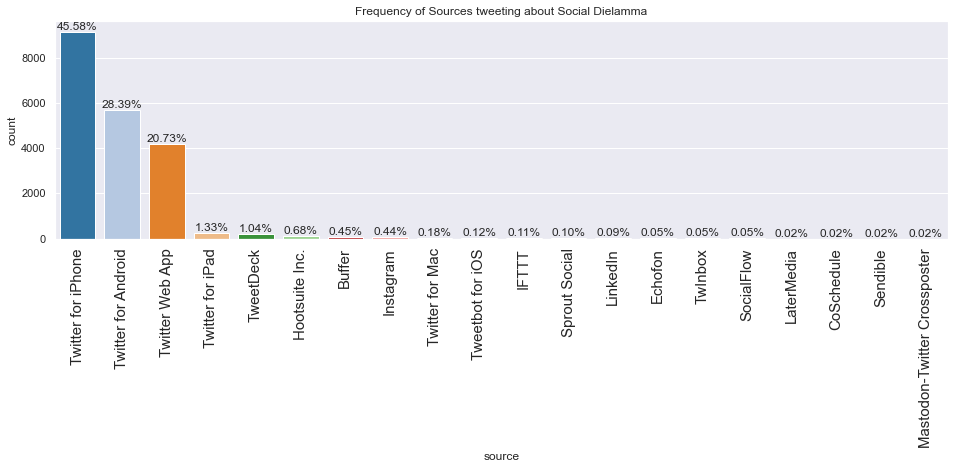

In [19]:
#Visualize the top 20 sources by number of tweets
labeled_barplot(data, 'source','Sources', 'tab20')

The highest proportion of tweets are made through Twitter for iPhone, followed by Android and the Twitter Web App.

# Top 20 user locations based on the number of tweets

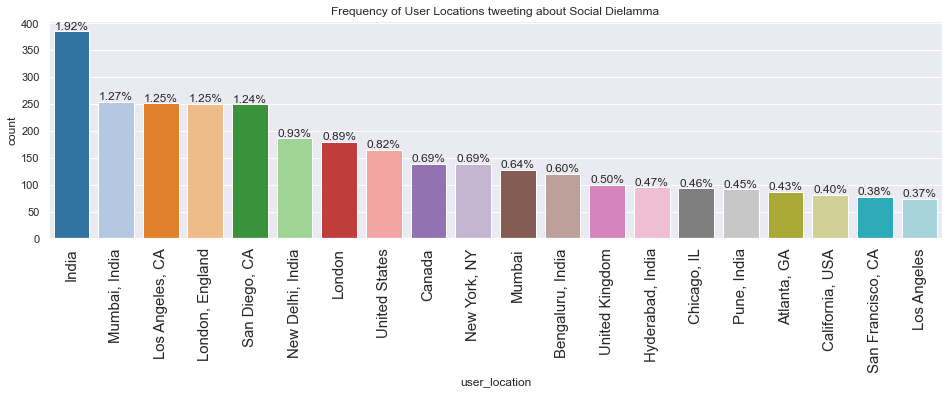

In [20]:
#Top 20 Users location based on the number of tweets¶
labeled_barplot(data, 'user_location', 'User Locations', 'tab20')

As we can see in the above all the locations were not in the format of city,country.
We take top 50 user locations with more number of tweets try to make the format into city,country.

In [21]:
# take the top 500 user locations based on no of tweets
dt = data['user_location'].value_counts().reset_index()  # get the counts of tweets which contains a fixed no of hashtags
dt.columns = ['user_location', 'count']
dt = dt.sort_values(['count'],ascending=False)[:50] #top 50 places
dt.head()

,user_location,count
0,India,385
1,"Mumbai, India",254
2,"Los Angeles, CA",251
3,"London, England",250
4,"San Diego, CA",249


In [22]:
#try to make the format into city,country for the top 50 places with more number of tweets
state = []
country = []
for i in dt['user_location']:
  loc = i.split(',')
  if len(loc)>1:   #if it has more than one token
    state.append(loc[0])
    country.append(loc[1])
  else:
    state.append('other') #if number of tokens is 1 then we keep it as other
    country.append('other')

dt['state'] = state
dt['country'] = country
dictionary = dict(zip(dt['state'], dt['country']))  #create a dictionary with key as city and value maps to its country
dt.head()

,user_location,count,state,country
0,India,385,other,other
1,"Mumbai, India",254,Mumbai,India
2,"Los Angeles, CA",251,Los Angeles,CA
3,"London, England",250,London,England
4,"San Diego, CA",249,San Diego,CA


In [23]:
#get the final locations
location = []
for i in range(len(dt)):
  loc = dt['user_location'][i].split(',')
  if len(loc)==2:  #if it has two tokens location will be same
    location.append(loc[0]+','+loc[1])
  else:
    try:
      country = dictionary[loc[0]]  #incase if only city is present we try to map it to the country from the above dataframe
      location.append(loc[0]+','+country)
    except:
      location.append('other')  #if we cant find the map then we leave it

dt["location"] = location
dt.head()

,user_location,count,state,country,location
0,India,385,other,other,other
1,"Mumbai, India",254,Mumbai,India,"Mumbai, India"
2,"Los Angeles, CA",251,Los Angeles,CA,"Los Angeles, CA"
3,"London, England",250,London,England,"London, England"
4,"San Diego, CA",249,San Diego,CA,"San Diego, CA"


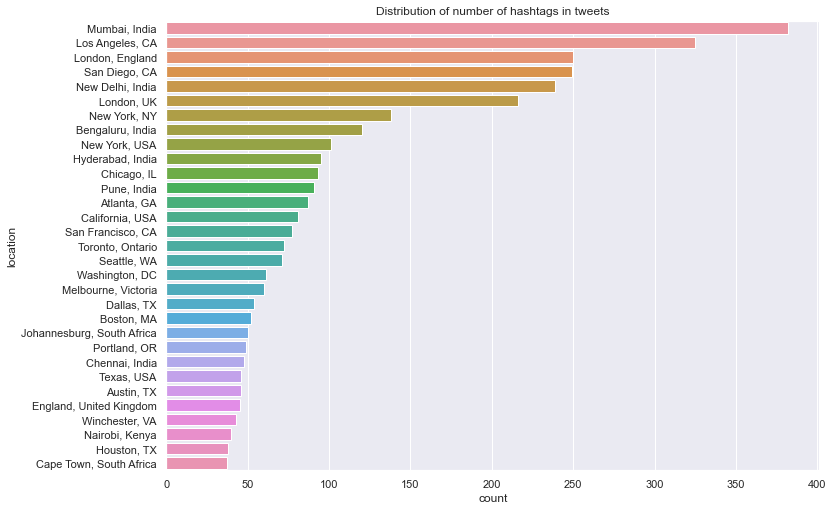

In [24]:
#get the count of tweets from every place
ds = dt.groupby(['location']).sum().sort_values(by='count', ascending=False).reset_index()
ds = ds[ds["location"]!="other"]

# get the plot with no of twwets contains x number of tags
dt = ds

fig = sns.barplot( 
    x
    =dt["count"], 
    y=dt["location"], 
    orientation='horizontal'
).set_title('Distribution of number of hashtags in tweets')


# Number of hashtags used in each tweet

In [25]:
data['hashtags'] = data['hashtags'].fillna('[]')        # fill the nan values with empty lists
data['hashtags_count'] = data['hashtags'].apply(lambda x: len(x.split(',')))    # get the no of hashtahs present in each tweet
data.loc[data['hashtags'] == '[]', 'hashtags_count'] = 0   # if it is empty list then replace the hastag count with 0

data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment,hashtags_count
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,[],Twitter Web App,False,Neutral,0
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,[],Twitter Web App,False,Neutral,0
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,[],Twitter for iPhone,False,Positive,0
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative,1
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive,1


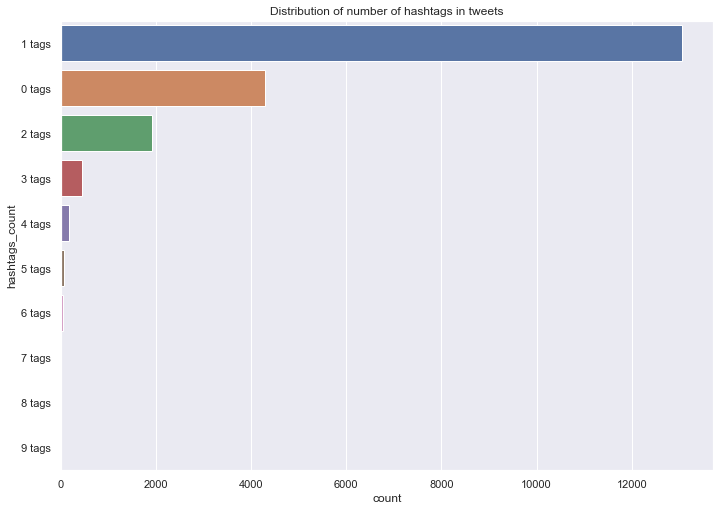

In [26]:
# get the plot with no of twwets contains x number of tags
ds = data['hashtags_count'].value_counts().reset_index()  # get the counts of tweets which contains a fixed no of hashtags
ds.columns = ['hashtags_count', 'count']
ds = ds.sort_values(['count'],ascending=False)   # Arrange them in descending order
ds['hashtags_count'] = ds['hashtags_count'].astype(str) + ' tags'   # add tag string to every count
fig = sns.barplot( 
    x
    =ds["count"], 
    y=ds["hashtags_count"], 
    orientation='horizontal'
).set_title('Distribution of number of hashtags in tweets')


Most users use just 1 hashtag, and the second most likely scenario is no hashtags.

Only a small proportion of the tweets use two hashtags or more.

# Tweet distribution by day

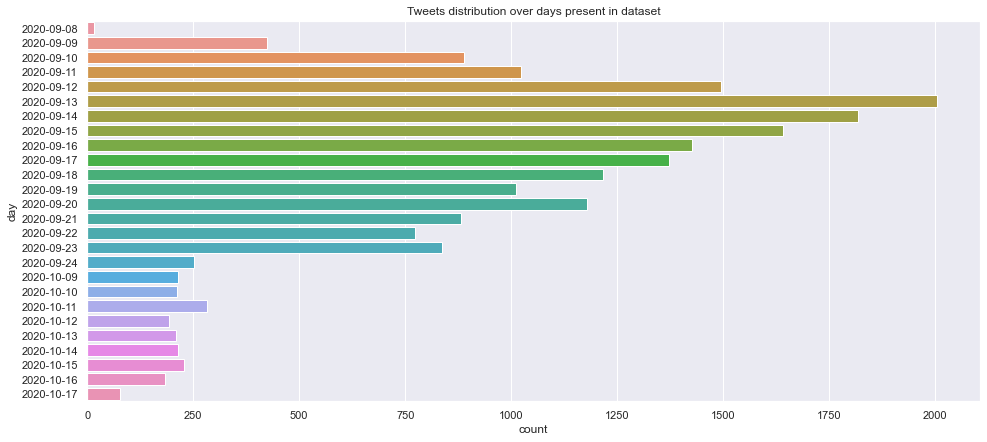

In [27]:
df = data.sort_values(['date'])
df['day'] = df['date'].astype(str).str.split(' ', expand=True)[0]
ds = df['day'].value_counts().reset_index()  # get the count of no of tweets for every day
ds.columns = ['day', 'count']
ds = ds.sort_values(['day'])

ds['day'] = ds['day'].astype(str)
plt.figure(figsize=(16, 7))
fig = sns.barplot( 
    x=ds['count'], 
    y=ds["day"], 
    orientation="horizontal",
).set_title('Tweets distribution over days present in dataset')

# Tweet distribution by hour of the day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Hour 0'),
  Text(1, 0, 'Hour 1'),
  Text(2, 0, 'Hour 2'),
  Text(3, 0, 'Hour 3'),
  Text(4, 0, 'Hour 4'),
  Text(5, 0, 'Hour 5'),
  Text(6, 0, 'Hour 6'),
  Text(7, 0, 'Hour 7'),
  Text(8, 0, 'Hour 8'),
  Text(9, 0, 'Hour 9'),
  Text(10, 0, 'Hour 10'),
  Text(11, 0, 'Hour 11'),
  Text(12, 0, 'Hour 12'),
  Text(13, 0, 'Hour 13'),
  Text(14, 0, 'Hour 14'),
  Text(15, 0, 'Hour 15'),
  Text(16, 0, 'Hour 16'),
  Text(17, 0, 'Hour 17'),
  Text(18, 0, 'Hour 18'),
  Text(19, 0, 'Hour 19'),
  Text(20, 0, 'Hour 20'),
  Text(21, 0, 'Hour 21'),
  Text(22, 0, 'Hour 22'),
  Text(23, 0, 'Hour 23')])

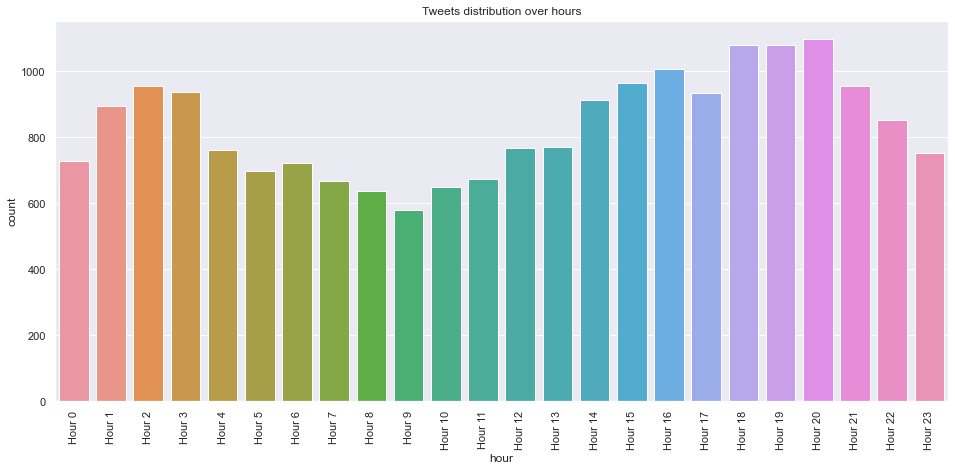

In [28]:
data['date'] = pd.to_datetime(data['date']) #change the format into datetime readable
data['hour'] = data['date'].dt.hour    # get the hour of every tweet
ds = data['hour'].value_counts().reset_index()  # get the count of no of tweets for every hour
ds.columns = ['hour', 'count']
ds = ds.sort_values(['hour'])
ds['hour'] = 'Hour ' + ds['hour'].astype(str)
plt.figure(figsize=(16, 7))
fig = sns.barplot( 
    x=ds["hour"], 
    y=ds["count"], 
    orientation='vertical', 
).set_title('Tweets distribution over hours')
plt.xticks(rotation='vertical')

# Distribution of words for each class before Text Preprocessing

In [29]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.text]
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment,hashtags_count,hour,word_count
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,[],Twitter Web App,False,Neutral,0,20,16
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,[],Twitter Web App,False,Neutral,0,20,18
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,[],Twitter for iPhone,False,Positive,0,20,20
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative,1,20,22
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive,1,20,17


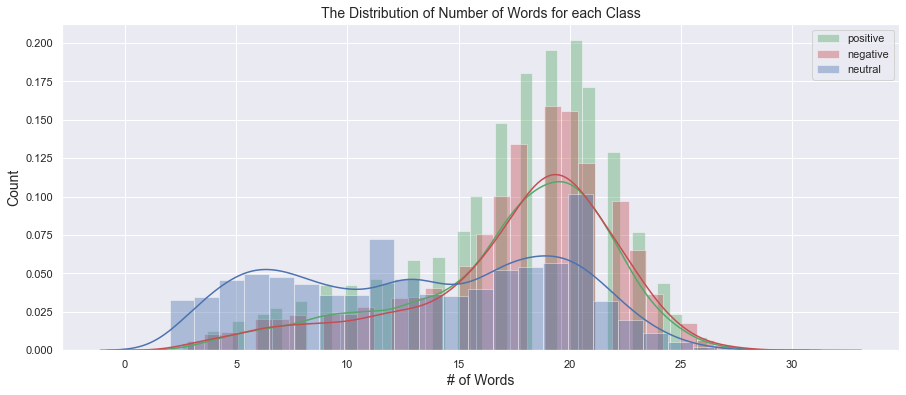

In [30]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.distplot(data['word_count'][data['Sentiment']=='Positive'], color='g', label = 'positive')
sns.distplot(data['word_count'][data['Sentiment']=='Negative'], color='r', label = 'negative')
sns.distplot(data['word_count'][data['Sentiment']=='Neutral'], color='b', label = 'neutral')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

# Word Cloud for Negative Tweets

In [31]:
from wordcloud import WordCloud,STOPWORDS

In [32]:
negative_tweets=data[data['Sentiment']=='Negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [33]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

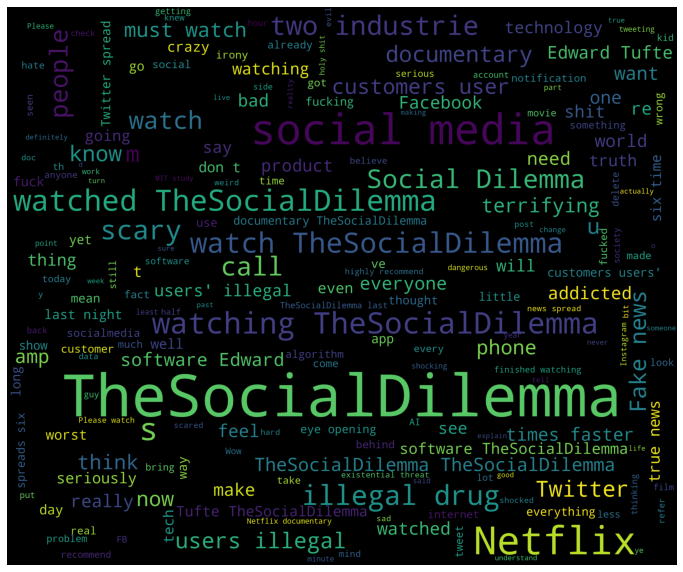

In [34]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Illegal, drug, bad, terrifying, addicted, scary, crazy are some of the most common negative terms

# Word Cloud for Positive Tweets

In [35]:
positive_tweets=data[data['Sentiment']=='Positive']
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [36]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

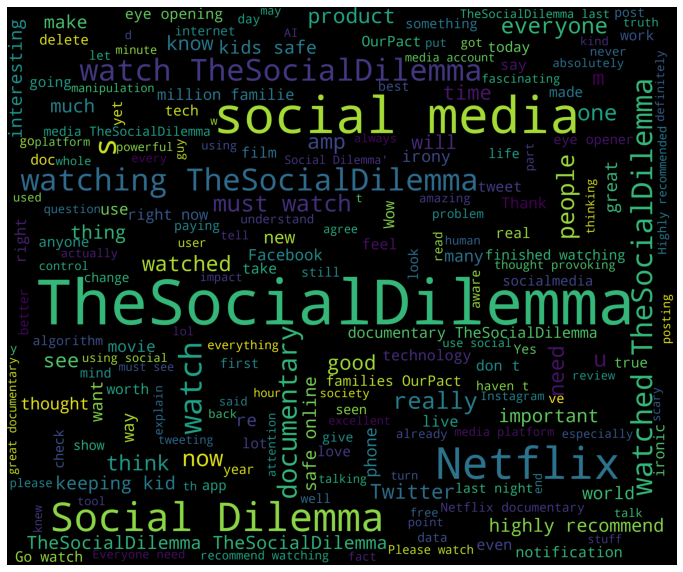

In [37]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Interesting, must watch, Please watch, highly recommend, important and eye opening, are the most common positive terms

# Word Cloud for Neutral Tweets

In [38]:
positive_tweets=data[data['Sentiment']=='Neutral']
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [39]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

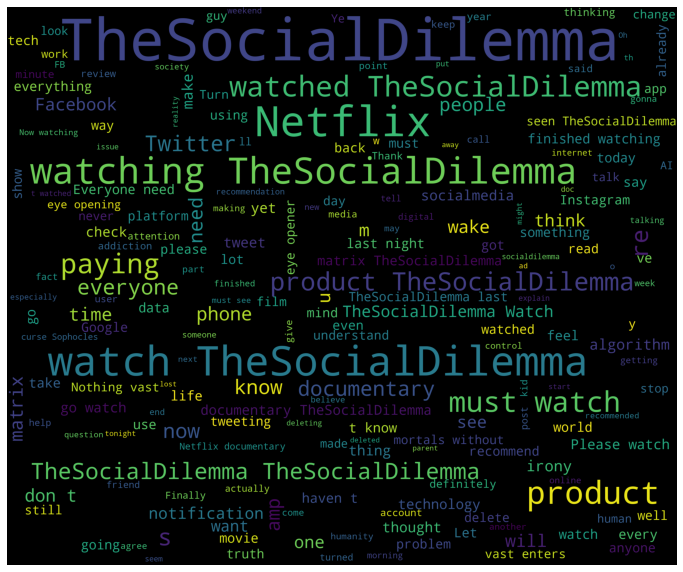

In [40]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Text Pre-processing

Remove html tags.

Replace contractions in string. (e.g. replace I'm --> I am) and so on.\

Remove numbers.
                                 
Remove the URL's.
                                 
Remove the mentions in the tweets('@').
                                 
Tokenization.
                                 
To remove Stopwords.
                                 
Remove the punctuations.
                                 
Remove the non-ASCII characters.
                                 
Remove the hashtags.
                                 
Lemmatized data.
                                 
We used Spacy for Lemmatization and Stopwords and the NLTK library to tokenize remaining words.

In [41]:
data = data[["text","Sentiment"]]

In [42]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebook I'm also reminded of the very poignant quote by French philosopher… https://t.co/CA52aepW6K,Neutral
1,"@musicmadmarc @SocialDilemma_ @netflix @Facebook haa, hey Marc. I get what you're saying &amp; don't agree. 🤪\n\nWhicheve… https://t.co/nsVtPHjUs8",Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nIt’s the best 100 minutes you’ll spend in 2020. I bet you💯… https://t.co/GSWCx3E9tG,Positive
3,I watched #TheSocialDilemma last night. I’m scared for humanity. \n\nI’m not sure what to do but I’ve logged out of F… https://t.co/luOBcjCJFb,Negative
4,The problem of me being on my phone most the time while trying to watch #TheSocialDilemma 🤦🏼‍♀️,Positive


In [43]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
data['text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,text,Sentiment
0,I am also reminded of the very poignant quote by French philosopher…,Neutral
1,"haa, hey Marc. I get what you are saying & do not agree. 🤪\n\nWhicheve…",Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nIt is the best minutes you will spend in . I bet you💯…,Positive
3,I watched #TheSocialDilemma last night. I am scared for humanity. \n\nI am not sure what to do but I have logged out of F…,Negative
4,The problem of me being on my phone most the time while trying to watch #TheSocialDilemma 🤦🏼‍♀️,Positive


# SPACY for Lemmatization and Stopwords

In [44]:
import spacy

In [45]:
nlp = spacy.load("en_core_web_sm")

In [46]:
def process_text(text):
    """
    Lemmatizes the text and removes stopwords.
    """
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [47]:
# Apply the function
data['text'] = data['text'].apply(process_text)

data.head()

,text,Sentiment
0,remind poignant quote french philosopher …,Neutral
1,"haa , hey Marc . say & agree . 🤪 \n\n Whicheve …",Neutral
2,"watch "" Social Dilemma "" Netflix ! \n\n good minute spend . bet 💯 …",Positive
3,watch # thesocialdilemma night . scared humanity . \n\n sure log F …,Negative
4,problem phone time try watch # thesocialdilemma 🤦 🏼‍ ♀ ️,Positive


# NLTK for Tokenization

In [48]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,text,Sentiment
0,"[remind, poignant, quote, french, philosopher, …]",Neutral
1,"[haa, ,, hey, Marc, ., say, &, agree, ., 🤪, Whicheve, …]",Neutral
2,"[watch, ``, Social, Dilemma, ``, Netflix, !, good, minute, spend, ., bet, 💯, …]",Positive
3,"[watch, #, thesocialdilemma, night, ., scared, humanity, ., sure, log, F, …]",Negative
4,"[problem, phone, time, try, watch, #, thesocialdilemma, 🤦, 🏼‍, ♀, ️]",Positive


In [49]:

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


  

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

In [50]:
data.head()

,text,Sentiment
0,remind poignant quote french philosopher,Neutral
1,haa hey marc say agree whicheve,Neutral
2,watch social dilemma netflix good minute spend bet,Positive
3,watch thesocialdilemma night scared humanity sure log f,Negative
4,problem phone time try watch thesocialdilemma,Positive


# Distribution of words for each class after Preprocessing

In [51]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.text]
data.head()

,text,Sentiment,word_count
0,remind poignant quote french philosopher,Neutral,5
1,haa hey marc say agree whicheve,Neutral,6
2,watch social dilemma netflix good minute spend bet,Positive,8
3,watch thesocialdilemma night scared humanity sure log f,Negative,8
4,problem phone time try watch thesocialdilemma,Positive,6


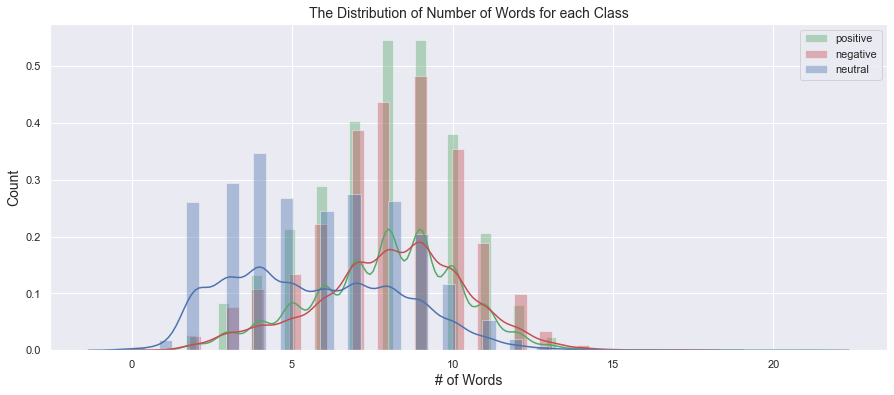

In [52]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.distplot(data['word_count'][data['Sentiment']=='Positive'], color='g', label = 'positive')
sns.distplot(data['word_count'][data['Sentiment']=='Negative'], color='r', label = 'negative')
sns.distplot(data['word_count'][data['Sentiment']=='Neutral'], color='b', label = 'neutral')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

# Conclusions

### **Text preprocessing**

- Text preprocessing is a crucial step in Natural Language Processing (NLP) and text analytics. It involves cleaning and formatting the raw data to make it suitable for various NLP tasks. The main goal is to remove any noise and inconsistencies in the data, making it easier to extract meaningful information.

- Text preprocessing is an important first step for any NLP application. Here we used several popular preprocessing approaches using Spacy, NLTK, Regex: lowercase, removing URLs, removing HTML tags, removing '@' mentions, removing punctuation, tokenization, stopword filtering, removing hashtags and lemmatization.
